In [1]:
from processing import *
from glob import glob
from pathlib import Path

#input path to .d file(s) to process
base_dir = Path('S:/Mar - Imaging - M2 - DHAP/Negative Mode Data/')
d_files_paths = list(base_dir.rglob("*.d"))
d_files_paths_str = [str(path) for path in d_files_paths]
d_files_paths_str

print(d_files_paths_str)

['S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section12_exp3_animal4_wt_neg\\Section12_exp3_animal4_wt_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section16_exp2_animal3_wt_neg\\Section16_exp2_animal3_wt_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section16_exp2_animal3_wt_neg\\Section10_exp2_animal9_wt_neg\\Section10_exp2_animal9_wt_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section26_exp3_animal2_5xfad_neg\\Section26_exp3_animal2_5xfad_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section26_exp3_animal5_wt_neg\\Section26_exp3_animal5_wt_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section27_exp3_animal5_wt_neg\\Section27_exp3_animal5_wt_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section28_exp3_animal1_5xfad_neg\\Section28_exp3_animal1_5xfad_neg.d', 'S:\\Mar - Imaging - M2 - DHAP\\Negative Mode Data\\Section28_exp3_animal1_5xfad_neg\\Section28_exp2_animal3_wt_neg\\Section28_exp2_anima

In [2]:
d_files_paths_str = [r"S:\Mar - Imaging - M2 - DHAP\Negative Mode Data\Section28_exp3_animal1_5xfad_neg\Section28_exp3_animal1_5xfad_neg.d"]

In [3]:
for path in d_files_paths_str:
    print(path)

S:\Mar - Imaging - M2 - DHAP\Negative Mode Data\Section28_exp3_animal1_5xfad_neg\Section28_exp3_animal1_5xfad_neg.d


In [4]:
%%time
#adjust height and prominence to to retain or remove low SNR features
process_d_files(d_files_paths_str, return_one_imzml=False, raw_data=True, peak_pick=True, ppm=50, mz_range=(150,1800), height=100, threshold = 0, prominence = 6, sampling_rate=20)
#process_d_files(d_files_paths_str, return_one_imzml=False, raw_data=True, peak_pick=True, ppm=30, mz_range=(450,2800), height=100, threshold = 10, prominence = 10, sampling_rate=20)

Extracting data from S:\Mar - Imaging - M2 - DHAP\Negative Mode Data\Section28_exp3_animal1_5xfad_neg\Section28_exp3_animal1_5xfad_neg.d...please wait
initializing...
getting database tables...


Reading FrameProperties: 100%|███████████████████████████████████████████████| 2670/2670 [00:05<00:00, 523.24 chunks/s]
Reading FrameMsMsInfo: 1 chunks [00:00, 500.16 chunks/s]
Reading CollisionEnergySweepingInfo: 1 chunks [00:00, 1001.27 chunks/s]
Reading Segments: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.86 chunks/s]
Reading ErrorLog: 1 chunks [00:00, 500.27 chunks/s]
Reading Properties: 100%|████████████████████████████████████████████████████| 9035/9035 [00:22<00:00, 407.56 chunks/s]


starting peak picking


getting sampled data for average spectrum: 100%|███████████████████████████████████| 3733/3733 [01:15<00:00, 49.19it/s]


continuing peak picking...
peaks found


generating spectrum dfs...: 100%|████████████████████████████████████████████████| 18666/18666 [12:05<00:00, 25.71it/s]


saving numpy files to S:\Mar - Imaging - M2 - DHAP\Negative Mode Data\Section28_exp3_animal1_5xfad_neg\Section28_exp3_animal1_5xfad_neg.d\coords.np
Data successfully written to S:\Mar - Imaging - M2 - DHAP\Negative Mode Data\Section28_exp3_animal1_5xfad_neg\Section28_exp3_animal1_5xfad_neg.d\processed.imzML
0
CPU times: total: 5h 4min 29s
Wall time: 18min 25s


In [5]:
%%time
#past pack in the imzML file written in the previous block
data = loadimzMLData('S:/Mar - Imaging - M2 - DHAP/Negative Mode Data/Section28_exp3_animal1_5xfad_neg/Section28_exp3_animal1_5xfad_neg.d/processed.imzML')

TODO: convert indices into real world coordinates
loaded spectra
file loaded
CPU times: total: 6min 21s
Wall time: 6min 22s


###### data.coords


In [7]:
from scipy.io import loadmat
mz_bins_neg = loadmat('S:/Mar - Imaging - M2 - DHAP/Negative Mode Data/mz_bins_use_neg')

In [8]:
mz_bins_mat = np.squeeze(mz_bins_neg['mz_bins_use_neg'].T)

In [55]:
mz_bins_mat.shape

(4031,)

In [56]:
mz_bins_mat

array([ 241.01121035,  241.050846  ,  243.06586921, ..., 1793.98045932,
       1794.06779892, 1794.9829131 ])

In [39]:
#mz_bins_use_neg = np.load('S:/Mar - Imaging - M2 - DHAP/Negative Mode Data/mz_bins_use_neg.npy') #path to mz bins use
mz_bins_m1vm2 = mz_bins_use

In [11]:
%%time
#extract bins from imzml data
#in the extractMZFeatures function, you can input a list of bins to bin the data to, or it will choose its own bins
intens_array, mz_bins_use, c = extractMZFeatures(data, ppm=100, mz_range=(150,1800), mz_bins = [],rebinning=False, feature_n=0.1, threshold_value =100,peak_pick=False)

Constructing Datacube: 100%|████████████████████████████████████████████████████| 12427/12427 [00:24<00:00, 513.74it/s]


CPU times: total: 46.8 s
Wall time: 46.6 s


In [27]:
mz_bins_use = np.array(mz_bins_use)

In [40]:
np.shape(mz_bins_use)


(1781,)

1179.7160602450767

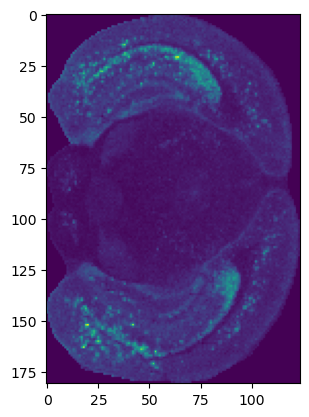

In [12]:
intens_arrayt = np.transpose(intens_array,(0,2,1))
#mzuse = np.argmin(abs(mz_bins_use_neg -   1572.8)) #find the mass channel closest to mz 713.4533
#mz_bins_use = mz_bins_mat
#mz_bins_use = np.array(mz_bins_use)
#mzuse = np.argmin(abs(np.array(mz_bins_m1vm2) - 1179.73)) #find the mass channel closest to mz 713.4533

mzuse = np.argmin(abs(np.array(mz_bins_use) - 1179.73)) #find the mass channel closest to mz 713.4533


plt.imshow( intens_arrayt[:,:,mzuse])
mz_bins_use[mzuse]

In [42]:
intens_array.shape

(157, 1781, 262)

In [43]:
intens_arrayT = np.transpose(intens_array, (0,2,1))

In [44]:
intens_arrayT.shape

(157, 262, 1781)

In [13]:
#depending on how the image was acquired on the ITO slide, it may be necessary to rotate the image

from scipy.ndimage import rotate

def rotate_hyperspectral_image(image, rotation_degrees):
    """
    Rotate each spectral slice of a 3D hyperspectral image by the specified number of degrees.
    The 'extra' space created by rotation is filled with zeros.

    Parameters:
    - image (numpy.ndarray): The 3D hyperspectral image to be processed, with dimensions [x, y, spectral].
    - rotation_degrees (float): The rotation angle in degrees. Positive values rotate counter-clockwise.

    Returns:
    - numpy.ndarray: The rotated 3D hyperspectral image with uniform dimensions across slices.
    """
    # Placeholder for the maximum dimensions after rotation
    max_height = 0
    max_width = 0

    # Determine the new dimensions after rotation for all slices
    for i in range(image.shape[2]):
        spectral_slice = image[:, :, i]
        # Temporarily rotate to find new dimensions
        temp_rotated_slice = rotate(spectral_slice, rotation_degrees, reshape=True, mode='constant', cval=0)
        max_height = max(max_height, temp_rotated_slice.shape[0])
        max_width = max(max_width, temp_rotated_slice.shape[1])

    # Initialize an array for the rotated image with determined max dimensions
    rotated_image = np.zeros((max_height, max_width, image.shape[2]))

    # Rotate each slice and fit it into the pre-determined dimensions
    for i in tqdm(range(image.shape[2]), desc="Rotating slices"):
        spectral_slice = image[:, :, i]
        rotated_slice = rotate(spectral_slice, rotation_degrees, reshape=True, mode='constant', cval=0)
        # Calculate starting indices to center the slice
        start_y = (max_height - rotated_slice.shape[0]) // 2
        start_x = (max_width - rotated_slice.shape[1]) // 2
        # Insert the rotated slice into the corresponding position in the rotated_image array
        rotated_image[start_y:start_y+rotated_slice.shape[0], start_x:start_x+rotated_slice.shape[1], i] = rotated_slice

    return rotated_image

In [16]:
mz_bins_use

[240.99781821935892,
 243.07912813813294,
 244.05329427082654,
 244.1021049296807,
 245.03136448060545,
 250.83212256282812,
 251.98849230504345,
 252.9983636868948,
 253.04896335963218,
 255.08127023221132,
 255.2343496061437,
 256.052325793955,
 256.20598791775893,
 256.2572291153425,
 256.97568287981113,
 257.02707801638707,
 257.0784834319903,
 258.0571420803261,
 258.9877287873859,
 259.0395263331434,
 259.09133423841,
 260.07765550332607,
 261.0677315431383,
 262.0615766517029,
 262.11398896703326,
 263.90225849731513,
 263.9550389490146,
 264.90689421846093,
 264.95987559730463,
 265.0128675724241,
 265.0658701459386,
 267.03443544434066,
 267.0878423314295,
 267.94380664586504,
 268.05099488627565,
 268.1046050852529,
 268.85627466140426,
 268.9638279255198,
 269.0176206911049,
 269.07142421524316,
 269.93374552179205,
 269.9877322708964,
 270.0417298173506,
 270.79883039952995,
 270.85299016560987,
 270.96134219579574,
 271.0155344642349,
 271.06973757112775,
 272.047249344048

Rotating slices: 100%|████████████████████████████████████████████████████████████| 1567/1567 [00:05<00:00, 274.86it/s]


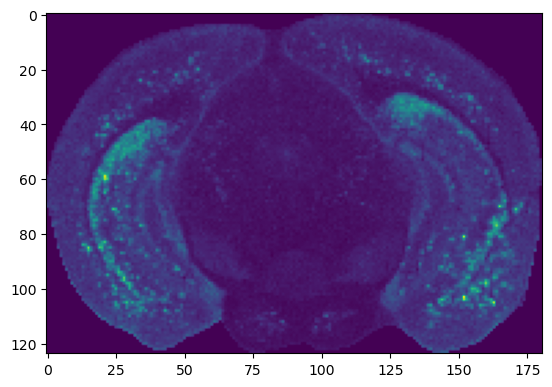

In [18]:
#rotate all m/z channels

import numpy as np
from scipy.ndimage import rotate
from tqdm import tqdm

mz_bins_use = np.array(mz_bins_use)

rotated_image = rotate_hyperspectral_image(intens_arrayt, 90)

mzuse = np.argmin(abs(mz_bins_use -   1179.73)) #find the mass channel closest to mz 713.4533

plt.imshow( rotated_image[:,:,mzuse])


In [52]:
np.shape(rotated_image)

(157, 262, 41418)

In [ ]:
resized_image.shape

In [47]:
from scipy.io import savemat

def save_image_as_mat(image, file_path, var_name='image'):
    """
    Save a multichannel image as a .mat file with a custom variable name.

    Parameters:
    - image (numpy.ndarray): The multichannel image to be saved.
    - file_path (str): The path (including filename and .mat extension) to save the file to.
    - var_name (str): The variable name to be used in the MATLAB workspace.
    """
    # Create a dictionary with the custom variable name as the key
    data = {var_name: image}

    # Save the dictionary to a .mat file
    savemat(file_path, data)

    print(f"Image saved as {file_path} with variable name '{var_name}'")

In [57]:
# Example usage:
# Assuming resized_image is the rotated/resized image you want to save
file_path = '../Aug24_SpinalCord_slide4_a5.mat'  # Specify the desired file path and name
Aug24_SpinalCord_slide4_a5 = rotated_image
save_image_as_mat(Aug24_SpinalCord_slide4_a5, file_path, var_name='Aug24_SpinalCord_slide4_a5')


Image saved as C:/Projects/Spinal Cord/Data/Processed MATLAB Data/Aug24_SpinalCord_slide4_a5.mat with variable name 'Aug24_SpinalCord_slide4_a5'
